# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("customer_booking.csv" , encoding="ISO-8859-1")

In [7]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [9]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [10]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [11]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [12]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

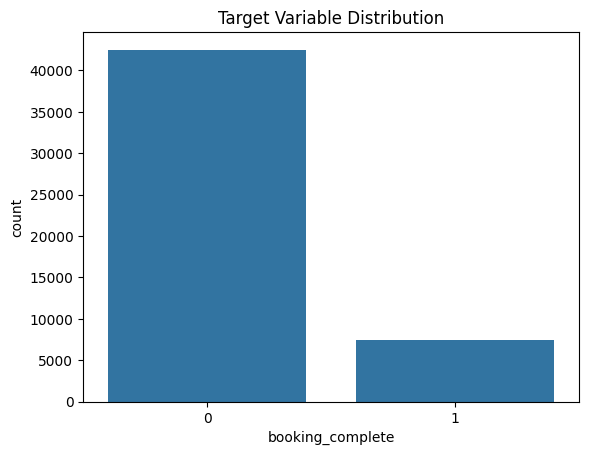

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='booking_complete', data=df)
plt.title("Target Variable Distribution")
plt.show()



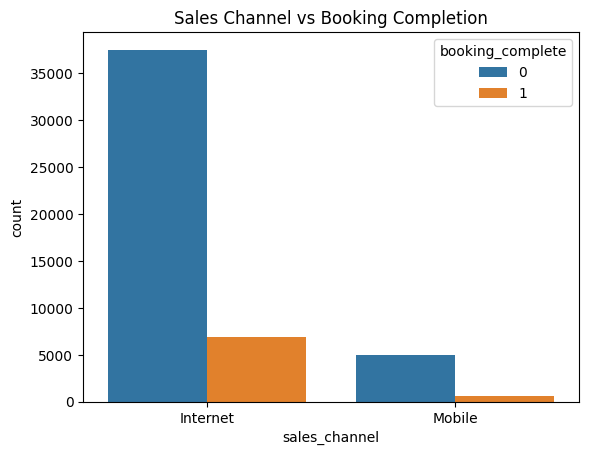

In [14]:
sns.countplot(x="sales_channel", hue="booking_complete", data=df)
plt.title("Sales Channel vs Booking Completion")
plt.show()

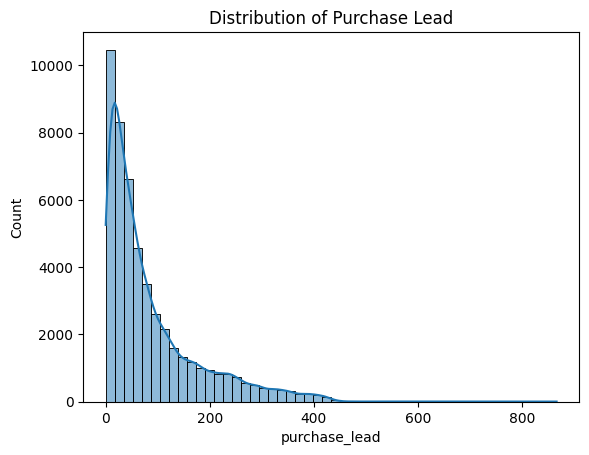

In [15]:
sns.histplot(df["purchase_lead"], bins=50, kde=True)
plt.title("Distribution of Purchase Lead")
plt.show()

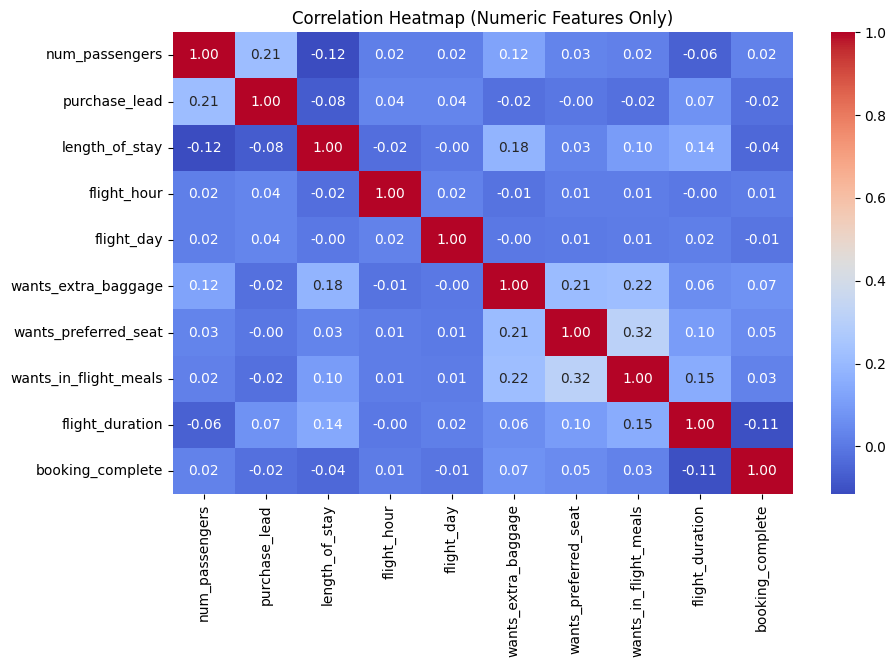

In [16]:
numeric_df = df.select_dtypes(include=["int64", "float64"])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

In [17]:
#one-hot encoding
categorical_cols = ["sales_channel", "trip_type", "route", "booking_origin"]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_encoded.head()


,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,262,19,7,6,1,0,0,5.52,0,...,False,False,False,False,False,False,False,False,False,False
1,1,112,20,3,6,0,0,0,5.52,0,...,False,False,False,False,False,False,False,False,False,False
2,2,243,22,17,3,1,1,0,5.52,0,...,False,False,False,False,False,False,False,False,False,False
3,1,96,31,4,6,0,0,1,5.52,0,...,False,False,False,False,False,False,False,False,False,False
4,2,68,22,15,3,1,0,1,5.52,0,...,False,False,False,False,False,False,False,False,False,False


In [18]:
print("Before encoding:", df.shape)
print("After encoding:", df_encoded.shape)


Before encoding: (50000, 14)
After encoding: (50000, 914)


In [19]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_encoded.drop("booking_complete", axis=1)
y = df_encoded["booking_complete"]

# Identify numeric columns (before scaling)
numeric_cols = ["num_passengers", "purchase_lead", "length_of_stay",
                "flight_hour", "flight_day", "flight_duration"]

# Initialize scaler
scaler = StandardScaler()

# Scale only numeric columns
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [20]:
from sklearn.model_selection import train_test_split

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [21]:
# Class balance check
print(y.value_counts(normalize=True))
print(y.value_counts())



booking_complete
0    0.85044
1    0.14956
Name: proportion, dtype: float64
booking_complete
0    42522
1     7478
Name: count, dtype: int64


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
rf = RandomForestClassifier(
    n_estimators=200,         # number of trees (you can tune later)
    max_depth=None,           # allow trees to grow fully
    random_state=42,
    class_weight="balanced"   # handle class imbalance
)

# Fit the model
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8526

Confusion Matrix:
 [[8350  154]
 [1320  176]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      8504
           1       0.53      0.12      0.19      1496

    accuracy                           0.85     10000
   macro avg       0.70      0.55      0.56     10000
weighted avg       0.81      0.85      0.81     10000



In [23]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_res))


Before SMOTE: Counter({0: 34018, 1: 5982})
After SMOTE: Counter({0: 34018, 1: 34018})


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_smote = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_smote.fit(X_train_res, y_train_res)

y_pred = rf_smote.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8348

Confusion Matrix:
 [[7925  579]
 [1073  423]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      8504
           1       0.42      0.28      0.34      1496

    accuracy                           0.83     10000
   macro avg       0.65      0.61      0.62     10000
weighted avg       0.81      0.83      0.82     10000



In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],          # number of trees
    'max_depth': [None, 10, 20, 30],          # tree depth
    'min_samples_split': [2, 5, 10],          # min samples to split a node
    'min_samples_leaf': [1, 2, 4],            # min samples at a leaf node
    'max_features': ['sqrt', 'log2']          # features considered per split
}


In [26]:
rf = RandomForestClassifier(random_state=42, class_weight="balanced")

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='f1',
    verbose=2,
    n_jobs=-1
)


In [27]:
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: 0.438129187497708


In [28]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7285
              precision    recall  f1-score   support

           0       0.94      0.73      0.82      8504
           1       0.32      0.73      0.45      1496

    accuracy                           0.73     10000
   macro avg       0.63      0.73      0.63     10000
weighted avg       0.85      0.73      0.76     10000



In [29]:
param_grid = {
    'n_estimators': [100, 200],          # fewer trees
    'max_depth': [None, 15],             # shallow vs. unrestricted
    'min_samples_split': [2, 5],         # only two options
    'min_samples_leaf': [1, 2],          # leaf size small only
    'max_features': ['sqrt']             # sqrt works best most times
}


In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Base RF model
rf = RandomForestClassifier(class_weight="balanced", random_state=42, n_jobs=-1)

# Reduced parameter space (keep it small for speed)
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Randomized search (10 iterations, 3-fold CV)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,               # only 10 random combinations
    cv=3,
    scoring='f1',            # better for imbalanced classes
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit on SMOTE-resampled training data
random_search.fit(X_train_res, y_train_res)

print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)

# Retrain with best parameters
best_rf = random_search.best_estimator_
best_rf.fit(X_train_res, y_train_res)

# Evaluate on test set
y_pred = best_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best CV Score: 0.9126887080654432
Accuracy: 0.8339
Confusion Matrix:
 [[7888  616]
 [1045  451]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      8504
           1       0.42      0.30      0.35      1496

    accuracy                           0.83     10000
   macro avg       0.65      0.61      0.63     10000
weighted avg       0.81      0.83      0.82     10000



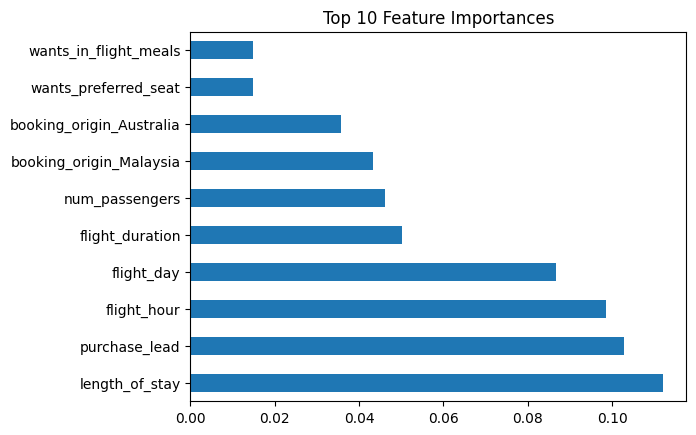

In [32]:

# Feature importance
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()


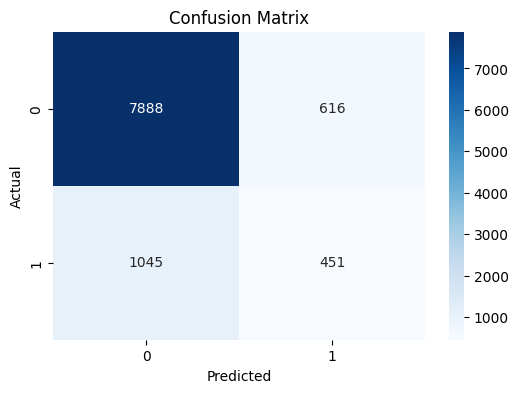

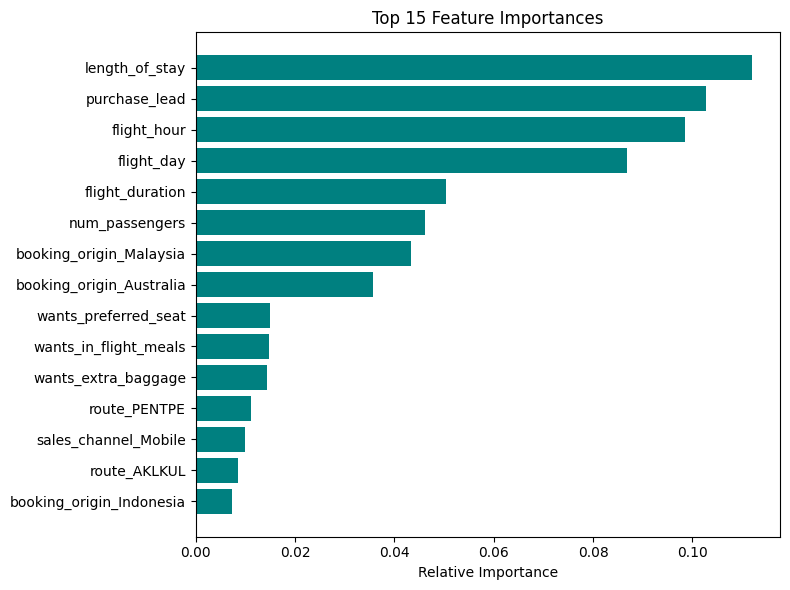

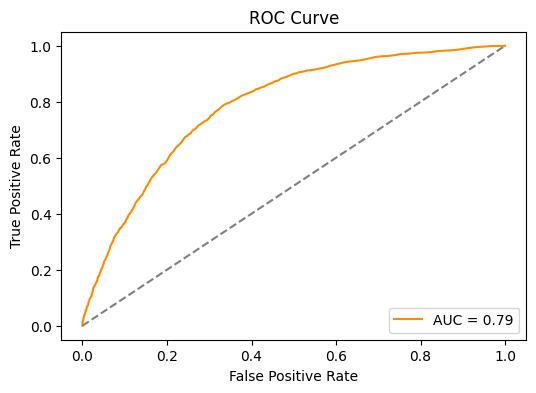

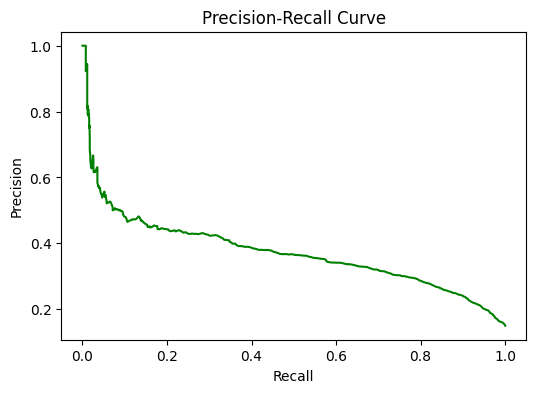

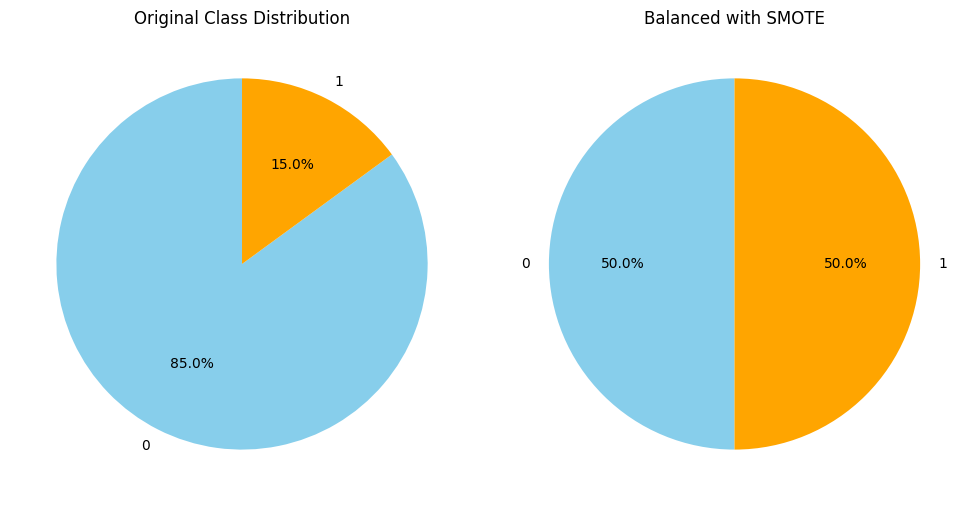

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# 1. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 2. Feature Importance (horizontal for PPT)
importances = best_rf.feature_importances_
indices = importances.argsort()[-15:]  # top 15
plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices], color="teal")
plt.yticks(range(len(indices)), [X_train_res.columns[i] for i in indices])
plt.title("Top 15 Feature Importances")
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()

# 3. ROC Curve
y_pred_prob = best_rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="darkorange")
plt.plot([0,1],[0,1],'--',color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# 4. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, color="green")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

# 5. Class Balance Pie Chart (before vs after SMOTE)
fig, ax = plt.subplots(1,2, figsize=(10,5))

# Original
y_train.value_counts().plot.pie(
    autopct='%1.1f%%', ax=ax[0], startangle=90, colors=["skyblue","orange"]
)
ax[0].set_title("Original Class Distribution")
ax[0].set_ylabel("")

# After SMOTE
y_train_res.value_counts().plot.pie(
    autopct='%1.1f%%', ax=ax[1], startangle=90, colors=["skyblue","orange"]
)
ax[1].set_title("Balanced with SMOTE")
ax[1].set_ylabel("")

plt.tight_layout()
plt.show()


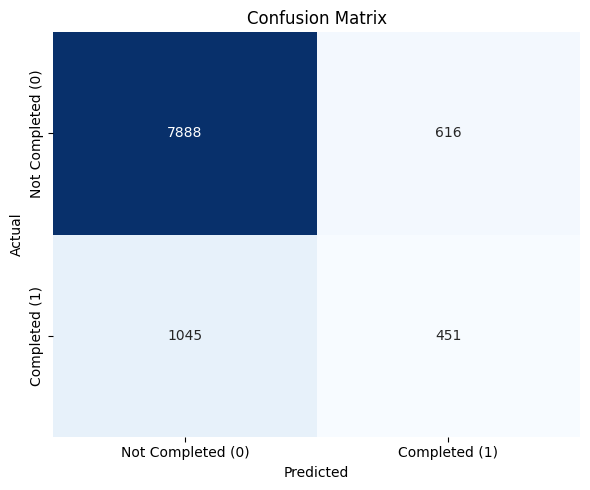

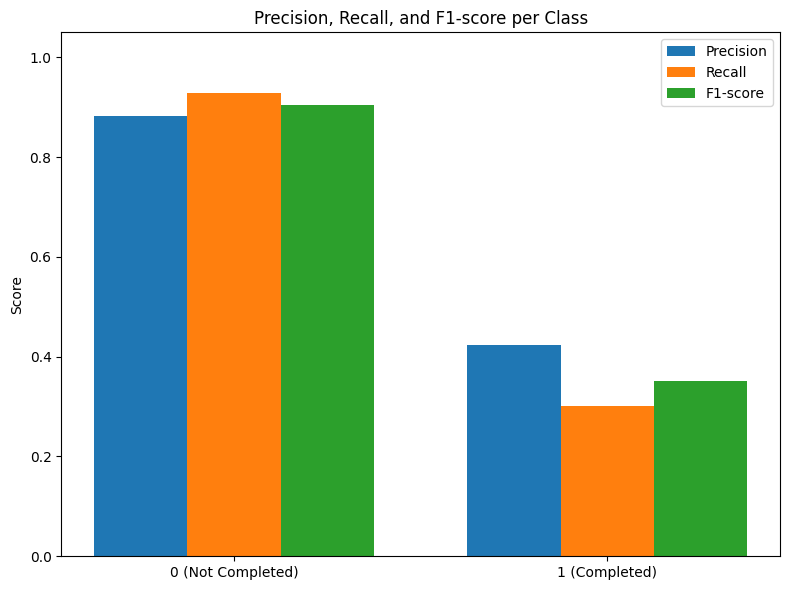

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predictions
y_pred = best_rf.predict(X_test)

# --- 1. Confusion Matrix Heatmap ---
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Completed (0)', 'Completed (1)'],
            yticklabels=['Not Completed (0)', 'Completed (1)'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# --- 2. Classification Report as Bar Chart ---
report = classification_report(y_test, y_pred, output_dict=True)

metrics = ['precision', 'recall', 'f1-score']
classes = ['0 (Not Completed)', '1 (Completed)']

# Build dataset for plotting
scores = {metric: [report['0'][metric], report['1'][metric]] for metric in metrics}

plt.figure(figsize=(8,6))
x = range(len(classes))
bar_width = 0.25

for i, metric in enumerate(metrics):
    plt.bar([p + i*bar_width for p in x], scores[metric], width=bar_width, label=metric.capitalize())

plt.xticks([p + bar_width for p in x], classes)
plt.ylim(0, 1.05)
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-score per Class")
plt.legend()
plt.tight_layout()
plt.show()
